# DESAFIO: TITANIC

## Elvis Edgard Inga De La Cruz

## INTRODUÇÃO
O dia 15 de abril de 1912 o jornal The New York Times publica na sua página principal a colisão de um navio chamado de Titanic. A suspeita era a morte de 1250 pessoas (https://br.pinterest.com/pin/660621839070438126/). Atualmente, possuimos uma base de dados reais com once variáveis que describe certas características relacionadas ao impacto do navio com o iceberg (https://github.com/conexalabs/desafio-data-analyst).


Como a nossa finalidade é analisar os dados para medir a chance de sobrevivência dos passageiros do Titanic, precisamos de certos aspectos metodológicos; assim, para este notebook, começaremos definindo o problema e determinamos o nosso objetivo. Logo, precisamos a obtenção dos dados. Seguidamente, faremos uma exploração de dados com a finalidade de fazer alguns questionamentos e formular a nossa hipótese, isto é, vamos elaborar quatro perguntas sobre o dataset titanic. Também, realizaremos tratamento e correções dos dados, caso seja necessário. O seguinte passo é a construção do modelo logístico; também, vamos elaborar tabelas e gráficos para apresentação dos resultado. Finalmente, apresentaremos uma conclusão sobre os dados analisados, também descreveremos os problemas encontrados ao longo da análise e quais foram as soluções adotadas. importando os dados;  logo, caso seja necessário, limpiaremos e/ou transformaremos os dados.   

Utilizaremos Python no ambiente Jupyter em Anaconda com a finalidade de desenvolver códigos que permitam entender e inferir o fenômeno abordado.

## 1. DEFINIÇÃO DO PROBLEMA

O dia 15 de abril de 1912 o jornal The New York Times publica na sua página principal a colisão de um navio. A suspeita era a morte de 1250 personas. Atualmente, temos informações que identifica certas variáveis relacionada à colisão do navio. 

## 2. OBJETIVO
O nosso objetivo é analisar os dados e determinar quais variáveis tiveram maior influência na probabilidade de sobrevivência.




precisamos responder as seguintes perguntas relacionada ao datasets titanic: 
* P1: Quantas colunas e linhas, e quais os tipos de cada variável? Defina. 
* P2: Qual a porcentagem de valores faltantes?
* P3: Como é a distribuição estatísitica dos dados? Apresente histograma. 
* P4: Quais grupos tinham mais chances de sobreviver?

Para responder estas preguntas, precisamos importar os pacotes necessários e logo importaremos os dados.

## 3. OBTENÇÃO DOS DADOS
### Importando pacotes e dados

Importaremos os dados utilizando a biblioteca pandas e nos asseguramos que os dados sejam realmente importados, para isso, utilizaremos a função head()

In [774]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from pandas import Timestamp

In [790]:
titanic = pd.read_parquet("../desafio/data/titanic.parquet")
titanic.head()


,name,survival,pclass,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,"Braund, Mr. Owen Harris",0.0,3,male,22.0,1,0,A/5 21171,7.2500,None,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,"Heikkinen, Miss. Laina",1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,None,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1.0,1,female,35.0,1,0,113803,53.1000,C123,S
4,"Allen, Mr. William Henry",0.0,3,male,35.0,0,0,373450,8.0500,None,S


## 4. EXPLORAÇÃO DE DADOS
A exploração de dados será baseada a partir de perguntas relacionadas ao dataset titanic.

### P1: Quantas colunas (variáveis) e linhas (entradas), e quais os tipos de cada variável? Defina.

In [791]:
print("Variáveis:\t{}\nEntradas:\t{}".format(titanic.shape[1], titanic.shape[0]))

Variáveis:	11
Entradas:	1309


In [792]:
display(titanic.dtypes)

name         object
survival    float64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
ticket       object
fare        float64
cabin        object
embarked     object
dtype: object

### Definição das variáveis
#### a. Variáveis Numéricas
* Discretas: Pclass, SibSp, Parch
* Contínuas: Age e Fare
* Alvo: Survival

#### b. Variáveis Categóricas: 
* Name, Sex, Ticket, Cabin, Embarked

### P2: Qual a porcentagem de valores faltantes?
A informação sobre a Cabin é a que possui o maior número de informações faltantes, com mais de 77,46%. Após, a coluna survival não possui valor em quase 32% dos passageiro; também, a coluna age possui 20% de informações faltantes. Finalmente, a coluna informando o Porto de embarque (Embarked)e fare possuem apenas 0,15% e 0,07% de informações faltantes respetivamente.

In [793]:
(titanic.isnull().sum() / titanic.shape[0]).sort_values(ascending=False)

cabin       0.774637
survival    0.319328
age         0.200917
embarked    0.001528
fare        0.000764
ticket      0.000000
parch       0.000000
sibsp       0.000000
sex         0.000000
pclass      0.000000
name        0.000000
dtype: float64

### P3: Como é a distribuição estatísitica dos dados? Apresente histograma.

In [794]:
titanic.describe()

,survival,pclass,age,sibsp,parch,fare
count,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


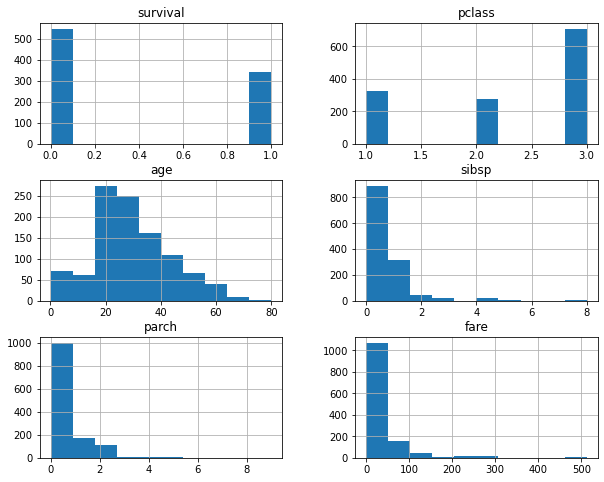

In [795]:
titanic.hist(figsize=(10,8));

### P4: Quais grupos tinham mais chances de sobreviver?

As mulheres tinham uma chance de sobrevivência de 74,20 %; já os homens 18,89% de sovevivência.

In [796]:
titanic[['sex', 'survival']].groupby(['sex']).mean()

,survival
sex,
female,0.742038
male,0.188908


## 5. TRATAMENTO E CORREÇÃO DOS DADOS

### Valores faltantes
Nesta seção vamos dar uma olhada nos valores que faltam, chamados missing values, e vamor preenchê-los com valores de média, mediana, valor mais frequente ou, caso seja, necessário, excluir a linha inteira.  


In [797]:
titanic.isnull().sum()

name           0
survival     418
pclass         0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       2
dtype: int64

Na pergunta n° 2 da seção anterior identificamos que o número de dados faltantes da variável cabine do passageiro (cabin) representava 77,46%. Também, a variável ticket não parece relevantes. Por outro lado, eliminaremos a variável parch; isto é, devido a que apresenta valores além de respostas categóricas do tipo binário. Assim, procedemos a excluí-lo do dataframe titanic. Chamaremos ao nosso novo dataframe de titanic2.

In [798]:
titanic2 = titanic

In [799]:
titanic2.drop(['ticket','cabin','parch'], axis=1, inplace=True)

In [800]:
titanic2.isnull().sum()

name          0
survival    418
pclass        0
sex           0
age         263
sibsp         0
fare          1
embarked      2
dtype: int64

Para as variáveis idade (age) e tarifa(fare), colocaremos o valor da mediana, e para variável do porto de embarque (embarked), se colocará o valor de maior frequência.

In [801]:
# idade
age_median = titanic2['age'].median()
titanic['age'].fillna(age_median, inplace=True)
# tarifa
fare_median = titanic2['fare'].median()
titanic['fare'].fillna(fare_median, inplace=True)
# embarque
embarked_top = titanic2['embarked'].value_counts()[0]
titanic['embarked'].fillna(embarked_top, inplace=True)

In [803]:
titanic2.isnull().sum()

name          0
survival    418
pclass        0
sex           0
age           0
sibsp         0
fare          0
embarked      0
dtype: int64

Para a variável survival, que informa que o passageiro sobreviveu ou não sobreviveu ao desastre, anularemos as linhas sem informação.

In [804]:
titanic2.dropna(axis=0, how="any")

,name,survival,pclass,sex,age,sibsp,fare,embarked
0,"Braund, Mr. Owen Harris",0.0,3,male,22.0,1,7.2500,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1.0,1,female,38.0,1,71.2833,C
2,"Heikkinen, Miss. Laina",1.0,3,female,26.0,0,7.9250,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1.0,1,female,35.0,1,53.1000,S
4,"Allen, Mr. William Henry",0.0,3,male,35.0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,"Montvila, Rev. Juozas",0.0,2,male,27.0,0,13.0000,S
887,"Graham, Miss. Margaret Edith",1.0,1,female,19.0,0,30.0000,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",0.0,3,female,28.0,1,23.4500,S
889,"Behr, Mr. Karl Howell",1.0,1,male,26.0,0,30.0000,C


In [805]:
titanic3 = titanic2.dropna(axis=0, how="any")

In [806]:
titanic3.isnull().sum()

name        0
survival    0
pclass      0
sex         0
age         0
sibsp       0
fare        0
embarked    0
dtype: int64

In [807]:
titanic3.describe()

,survival,pclass,age,sibsp,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,32.204208
std,0.486592,0.836071,13.019697,1.102743,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,512.329200


### Preparando as variáveis pro modelo

#### Variáveis dummy
Deve-se transformar os dados de entrada em formato de categoria para números. As variáveis sex e embarked serão transformadas para 0 e 1; essa transformação é conhecida como variáveis dummies.

In [808]:
titanic3.head()

,name,survival,pclass,sex,age,sibsp,fare,embarked
0,"Braund, Mr. Owen Harris",0.0,3,male,22.0,1,7.2500,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1.0,1,female,38.0,1,71.2833,C
2,"Heikkinen, Miss. Laina",1.0,3,female,26.0,0,7.9250,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1.0,1,female,35.0,1,53.1000,S
4,"Allen, Mr. William Henry",0.0,3,male,35.0,0,8.0500,S


In [809]:
def createDummies(df, var_name):
    dummy = pd.get_dummies(df[var_name], prefix=var_name)
    df = df.drop(var_name, axis = 1)
    df = pd.concat([df, dummy ], axis = 1)
    return df

In [810]:
createDummies(titanic3, "sex")

,name,survival,pclass,age,sibsp,fare,embarked,sex_female,sex_male
0,"Braund, Mr. Owen Harris",0.0,3,22.0,1,7.2500,S,0,1
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1.0,1,38.0,1,71.2833,C,1,0
2,"Heikkinen, Miss. Laina",1.0,3,26.0,0,7.9250,S,1,0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1.0,1,35.0,1,53.1000,S,1,0
4,"Allen, Mr. William Henry",0.0,3,35.0,0,8.0500,S,0,1
...,...,...,...,...,...,...,...,...,...
886,"Montvila, Rev. Juozas",0.0,2,27.0,0,13.0000,S,0,1
887,"Graham, Miss. Margaret Edith",1.0,1,19.0,0,30.0000,S,1,0
888,"Johnston, Miss. Catherine Helen ""Carrie""",0.0,3,28.0,1,23.4500,S,1,0
889,"Behr, Mr. Karl Howell",1.0,1,26.0,0,30.0000,C,0,1


In [811]:
titanic4 = createDummies(titanic3, "sex")

In [812]:
createDummies(titanic4, "embarked")

,name,survival,pclass,age,sibsp,fare,sex_female,sex_male,embarked_914,embarked_C,embarked_Q,embarked_S
0,"Braund, Mr. Owen Harris",0.0,3,22.0,1,7.2500,0,1,0,0,0,1
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1.0,1,38.0,1,71.2833,1,0,0,1,0,0
2,"Heikkinen, Miss. Laina",1.0,3,26.0,0,7.9250,1,0,0,0,0,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1.0,1,35.0,1,53.1000,1,0,0,0,0,1
4,"Allen, Mr. William Henry",0.0,3,35.0,0,8.0500,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,"Montvila, Rev. Juozas",0.0,2,27.0,0,13.0000,0,1,0,0,0,1
887,"Graham, Miss. Margaret Edith",1.0,1,19.0,0,30.0000,1,0,0,0,0,1
888,"Johnston, Miss. Catherine Helen ""Carrie""",0.0,3,28.0,1,23.4500,1,0,0,0,0,1
889,"Behr, Mr. Karl Howell",1.0,1,26.0,0,30.0000,0,1,0,1,0,0


In [953]:
titanic5 = createDummies(titanic4, "embarked")

## 6. O MODELO LOGISTICO 


### Construção e obtenção dos coeficientes do modelo
A seguir definiremos a variável regresada binária e as variáveis independentes; logo usaremos o pacote statsmodels, já carregados no início desde notebook, de Paython para obter os estatisticos e os coeficientes do modelo. Vamos descosiderar as variáveis dummies embarked e pclass, isto devido a que podriamos incorrer à presença de multicolinearidade.

In [1153]:
Y = titanic5["survival"]
X_new1 = titanic5[["age","sibsp","fare","sex_female","sex_male"]]



In [1154]:
Y = (Y - np.min(Y))/np.ptp(Y)

In [1155]:
logit_model = sm.Logit(Y,X_new1)


In [1156]:
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.479606
         Iterations 6


In [1157]:
print(result.summary2())

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.280     
Dependent Variable: survival         AIC:              864.6584  
Date:               2020-12-24 21:54 BIC:              888.6202  
No. Observations:   891              Log-Likelihood:   -427.33   
Df Model:           4                LL-Null:          -593.33   
Df Residuals:       886              LLR p-value:      1.3506e-70
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
age           -0.0191    0.0071  -2.7037  0.0069  -0.0329  -0.0052
sibsp         -0.4647    0.1006  -4.6213  0.0000  -0.6618  -0.2676
fare           0.0151    0.0027   5.5795  0.0000   0.0098   0.0205
sex_female     1.4030    0.259

### Interpretação dos resultados

O p-valor (P>|z|) de todas as vaiáveis é menor do que zero, isso quer dizer que as variáveis individuais são significativas e portanto devem ser considerados no modelo.

Quanto maior é a tarifa do passageiro (fare), maior é a chance de sobrevivência. Por outro lado, quanto maior é a idadade (age) menor é a chance de sobrevivência; Assim também, observamos que a maior quantidade de cênjuges e irmão a bordo (sibsp), menor é a chance de sobrevivência. Já, se a pessoa é do sexo feminino (sex_female), tem maior chance de sobrevivência se comparado com o sexo masculino (sex_male). 


## 7. CONCLUSÃO

Observamos que as variáveis apresenta significância individual, em outras palavras, cada variável, se analizada indivudualmente, explicaria a probabilidade de sobreviver ou não ao desastre. 

## 8. PROBLEMAS ENCONTRADOS E SOLUÇÕES PROPOSTAS

A seguir describiremos os problemas encontrados e as soluções propostas.

* Variáveis com alto porcentagem de dados faltantes: A solução foi a eliminação das variáveis.
* Dados faltantes em algumas variáveis: a solução foi a imputação dos dados mediante a mediana, média e/ou modo. 
* Variáveis com dados não condicentes com o tipo de variável: Tiramos da nossa análise a variável parch.
* Variáveis similáres que podriam gerar multicolinearidade: a solução foi tirar do modelo e ficar apenas com a variável com menor p-value.

